<a href="https://colab.research.google.com/github/VincentZuo/fin-models/blob/main/%5BFinal%5D_V14_torch_LSTM_Attention_logits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up and read data

In [ ]:
!pip install transformers==4.17.0
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.8 MB 5.1 MB/s 
     |████████████████████████████████| 86 kB 2.5 MB/s 
     |████████████████████████████████| 880 kB 7.2 MB/s 
     |████████████████████████████████| 596 kB 36.4 MB/s 
     |████████████████████████████████| 6.6 MB 30.9 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=98f1153dded260f59665b382d44fbfdbe333752270c09651e443b5adec48e8a0
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 3.5 MB/s 
     |████████

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
import torch
import transformers
print(transformers.__version__)
print(torch.__version__)

4.17.0
1.11.0+cu113


In [ ]:
import sys
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
read_df = pd.read_pickle("/content/gdrive/MyDrive/224U_2022/final_project_data.pkl")

In [ ]:
read_df.head()

,title,label,range,emb
0,Joseph Greenberg,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","(0, 106)","[[-0.07557425, -0.011484241, -0.07807306, 0.00..."
1,Pauline Donalda,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","(106, 127)","[[-0.057122264, 0.005889078, -0.030671664, -0...."
2,List of German football transfers summer 2017,"[0, 0, 1, 0, 0]","(127, 132)","[[-0.0032938644, -0.02310217, -0.05397396, -0...."
3,Lester Hudson,"[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, ...","(132, 176)","[[-0.0091192825, 0.090078354, -0.029187214, -0..."
4,Monique Ganderton,"[1, 0, 0, 0, 0, 1, 0]","(176, 183)","[[-0.090651, -0.09176681, -0.029592248, -0.062..."


In [ ]:
read_df = read_df.sample(frac=1)
read_df.head()

,title,label,range,emb
1636,Ahmed Gailani,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, ...","(31019, 31050)","[[-0.059429865, 0.011445425, -0.03338002, -0.0..."
330,Leuciacria,[0],"(7831, 7832)","[[-0.008817376, 0.05713093, -0.03191059, -0.03..."
475,Yumiko Udo,"[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, ...","(8876, 8899)","[[-0.056387637, 0.030536033, -0.05530674, 0.01..."
867,Great rhombidodecacron,"[0, 0, 0, 0]","(18177, 18181)","[[-0.02607391, 0.0011399174, -0.04927563, -0.0..."
280,"Wynberg, Gauteng","[0, 0, 0]","(5689, 5692)","[[0.021064714, 0.09494834, -0.12846708, 0.1025..."


In [ ]:
MAX_SEQ_LENGTH = 128

In [ ]:
from sentence_transformers import SentenceTransformer
#Define the model
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
start_sentence = sentence_model.encode(['<s>'])
end_sentence = sentence_model.encode(['</s>'])
pad_sentence = sentence_model.encode(['<PAD>'])

start_index = 2
end_index = 3
pad_index = 4
MAX_SEQ_LENGTH=128

label_list = [0, 1, 2, 3, 4]

In [ ]:
print(pad_sentence.shape)
print(np.repeat(pad_sentence, 3, axis=0).shape)

(1, 384)
(3, 384)


In [ ]:
def pad_emb_and_label(current_emb, current_label, seq_len):
  mask = [True] * seq_len
  if len(current_emb) > seq_len-2:
    emb =  np.concatenate([start_sentence, current_emb[0:seq_len-2], end_sentence], axis=0)
    label = np.concatenate([[2], current_label[0:seq_len-2], [3]], axis=0)
    return emb, np.array(label, dtype='int64'), np.array(mask, dtype='bool')
  remainder = seq_len - len(current_emb) -2
  emb =  np.concatenate([start_sentence, current_emb, end_sentence, np.repeat(pad_sentence, remainder, axis=0)], axis=0)
  label = np.concatenate([ [2], current_label, [3], [4]*remainder ], axis=0)
  mask = [True] * (seq_len - remainder) + [False] * remainder
  return emb, np.array(label, dtype='int64'), np.array(mask, dtype='bool')

In [ ]:
current_emb_test = torch.rand(2, 384)
current_lb_test = torch.rand(2).int()
pad_emb_and_label(current_emb_test, current_lb_test, 6)

(array([[-0.04406207,  0.03838372,  0.00484041, ...,  0.0311034 ,
          0.01591941,  0.00702972],
        [ 0.0160653 ,  0.61065936,  0.13253587, ...,  0.34109396,
          0.5289854 ,  0.6737633 ],
        [ 0.6792437 ,  0.3925634 ,  0.14542621, ...,  0.13049364,
          0.72709787,  0.00351852],
        [-0.07066056,  0.05041865,  0.02269809, ...,  0.0827581 ,
          0.00083504, -0.00483721],
        [-0.01210596, -0.02500226, -0.05478036, ...,  0.09664077,
         -0.00282556,  0.00482554],
        [-0.01210596, -0.02500226, -0.05478036, ...,  0.09664077,
         -0.00282556,  0.00482554]], dtype=float32),
 array([2, 0, 0, 3, 4, 4]),
 array([ True,  True,  True,  True, False, False]))

In [ ]:
from torch.utils.data import Dataset

class WikiPandasDfDataSet(Dataset):
  def __init__(self, input_df):
    self.pandas_df = input_df

  def __getitem__(self, index):
    seq = np.array(self.pandas_df.iloc[index]["emb"], dtype='double')
    label = np.array(self.pandas_df.iloc[index]["label"], dtype='double')
    return seq, label

  def __len__(self):
      return len(self.pandas_df)

def collate_fn(batch):
    batched_seq = []
    batched_label = []
    batched_mask = []
    for seqs, labels in batch:
      try:
        local_emb, local_label, local_mask = pad_emb_and_label(seqs, labels, MAX_SEQ_LENGTH)
        batched_seq.append(local_emb)
        batched_label.append(local_label)
        batched_mask.append(local_mask)
      except Exception as e:
        print("collate_fn err:", e)
        continue
    return torch.tensor(batched_seq).float(), torch.tensor(batched_label), torch.tensor(batched_mask).bool()

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE_TRAIN = 32

dataset_train = WikiPandasDfDataSet(read_df.head(6400))
train_dataloader = DataLoader(dataset_train, batch_size=BATCH_SIZE_TRAIN, collate_fn = collate_fn, shuffle=True, drop_last=True)
dataset_val = WikiPandasDfDataSet(read_df.tail(3200))
val_dataloader = DataLoader(dataset_val, batch_size=BATCH_SIZE_TRAIN, collate_fn = collate_fn, shuffle=False, drop_last=True)

# NN Model code

In [ ]:
import torch.nn as nn
import datetime
from torch.nn import TransformerEncoderLayer
import math

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, emb_size, dropout=0.1, maxlen=MAX_SEQ_LENGTH):
        super(PositionalEncoding, self).__init__()
        den = torch.exp(- torch.arange(0, emb_size, 2)* math.log(10000) / emb_size)
        pos = torch.arange(0, maxlen).reshape(maxlen, 1)
        pos_embedding = torch.zeros((maxlen, emb_size))
        pos_embedding[:, 0::2] = torch.sin(pos * den)
        pos_embedding[:, 1::2] = torch.cos(pos * den)
        pos_embedding = pos_embedding.unsqueeze(-2)

        self.dropout = nn.Dropout(dropout)
        self.register_buffer('pos_embedding', pos_embedding)

    def forward(self, token_embedding):
        return self.dropout(token_embedding + self.pos_embedding[:token_embedding.size(0), :])


class TransformerClassifierModel(nn.Module):
  def __init__(self, emb_dim=384, nhead = 16):
    super(TransformerClassifierModel, self).__init__()
    self.transformer_encoder = TransformerEncoderLayer(d_model=emb_dim,
                                                        nhead=nhead)
    self.classifier_layer = nn.Linear(emb_dim, 5)
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self, seq_input):
    trans_enc = self.transformer_encoder(seq_input)
    linear_output = self.classifier_layer(trans_enc)
    return self.softmax(linear_output)

class BiLstmClassifierModel(nn.Module):
  def __init__(self, hidden_dim, emb_dim=384):
    super().__init__()
    self.hidden_dim = hidden_dim
    self.lstm = nn.LSTM(emb_dim, self.hidden_dim, batch_first=True, bidirectional=True)
    self.linear_layer = nn.Linear(self.hidden_dim*2, 5)
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self, seq_input):
    outputs, _ = self.lstm(seq_input)
    linear_output = self.linear_layer(outputs)
    return self.softmax(linear_output)

class BiLstmWithAttentionClassifierModel(nn.Module):
  def __init__(self, hidden_dim, nhead=4, emb_dim=384):
    super().__init__()
    self.hidden_dim = hidden_dim
    self.transformer_encoder = TransformerEncoderLayer(d_model=emb_dim, nhead=nhead)
    self.lstm = nn.LSTM(emb_dim, self.hidden_dim, batch_first=True, bidirectional=True)
    self.linear_layer = nn.Linear(self.hidden_dim*2, 5)
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self, seq_input):
    outputs = self.transformer_encoder(seq_input)
    outputs,_ = self.lstm(outputs)
    linear_output = self.linear_layer(outputs)
    return self.softmax(linear_output)

# Training loop code

In [ ]:
from tqdm import tqdm
from transformers import AdamW
from sklearn.metrics import f1_score,accuracy_score

In [ ]:
def train(train_dataloader, is_early=False, max_batches=500):
    model.train()

    total_loss, total_accuracy = 0, 0
    step = 0
    criterion = torch.nn.CrossEntropyLoss(ignore_index=4)
    # iterate over batches
    for batch in tqdm(train_dataloader):
        sequences, labels, mask = batch[0].to(device), batch[1].to(device), batch[2].to(device)

        model.zero_grad()        
        preds = model(sequences)

        preds_reshape = torch.reshape(preds, [preds.shape[0] * preds.shape[1], preds.shape[2]])
        labels_reshape = torch.reshape(labels, [labels.shape[0] * preds.shape[1]])

        loss = criterion(preds_reshape, labels_reshape.to(torch.int64))
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        
        total_loss += loss.item()

        # progress update after every 100 batches.
        if step % 50 == 0 and not step == 0:
            
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
            print("loss",loss.item())
            torch.cuda.empty_cache()
            if is_early and step>=max_batches:
                print("early stopping...")
                break
        step+=1
    # compute the training loss of the epoch
    avg_loss = total_loss / step
    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    #total_preds  = np.concatenate(total_preds, axis=0)

    #returns the loss and predictions
    return avg_loss

def evaluate(dev_dataloader, is_early=False, max_batches=500):
  
    print("\nEvaluating...")
  
    # deactivate dropout layers
    model.eval()
    total_loss, total_accuracy = 0, 0
    eval_preds = []
    eval_labels = []
    curr_examples = 0
    criterion = torch.nn.CrossEntropyLoss(ignore_index=4)
    # iterate over batches
    step = 0
    for batch in tqdm(dev_dataloader):
      sequences, labels, mask = batch[0].to(device), batch[1].to(device), batch[2].to(device)
      curr_examples += len(labels)
      # deactivate autograd
      with torch.no_grad():
    
      # model predictions
          preds = model(sequences)
          preds_reshape = torch.reshape(preds, [preds.shape[0] * preds.shape[1], preds.shape[2]])
          labels_reshape = torch.reshape(labels, [labels.shape[0] * preds.shape[1]])
          loss = criterion(preds_reshape, labels_reshape.to(torch.int64))
          total_loss = total_loss + loss.item()
          eval_preds += torch.argmax(preds.detach().cpu(), dim=-1).numpy().flatten().tolist()
          eval_labels += labels.detach().cpu().numpy().flatten().tolist()
      step+=1
    # compute the validation loss of the epoch
    avg_loss = total_loss / step 

    return avg_loss, eval_preds, eval_labels

In [ ]:
LEARING_RATE = 0.002
HIDDEN_DIM_SIZE = 256
NUM_EPOCS = 10

model = BiLstmWithAttentionClassifierModel(hidden_dim=HIDDEN_DIM_SIZE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = AdamW(model.parameters(),lr = LEARING_RATE)

train_losses = []
valid_losses = []
accuracy_list = []
f1_list = []

for epoch in range(NUM_EPOCS):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, NUM_EPOCS))
    
    #train model
    train_loss = train(train_dataloader, is_early=True)
    
    #evaluate model
    valid_loss, e_pred, e_label = evaluate(val_dataloader, is_early=True)

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    # accuracy_list.append(accuracy)
    # f1_list.append(valid_f1)

    print('Train loss:', train_loss, 'Val loss:', valid_loss)

    labels_bool = [ elem > 0 for elem in e_label]
    preds_bool = [elem > 0 for elem in e_pred][0: len(labels_bool)]
    accuracy = accuracy_score(labels_bool, preds_bool)
    valid_f1 = f1_score(labels_bool, preds_bool,average="macro")
    print('Accuracy:', accuracy, 'F1:', valid_f1)
    accuracy_list.append(accuracy)
    f1_list.append(valid_f1)


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,



 Epoch 1 / 10


 26%|██▌       | 51/200 [00:10<00:31,  4.75it/s]

  Batch    50  of    200.
loss 0.5426117181777954


 50%|█████     | 101/200 [00:21<00:20,  4.77it/s]

  Batch   100  of    200.
loss 0.5549741387367249


 76%|███████▌  | 151/200 [00:31<00:10,  4.74it/s]

  Batch   150  of    200.
loss 0.5361263155937195


100%|██████████| 200/200 [00:41<00:00,  4.79it/s]



Evaluating...


100%|██████████| 100/100 [00:14<00:00,  6.81it/s]


Train loss: 0.572819962054491 Val loss: 0.5200600436329842
Accuracy: 0.95507080078125 F1: 0.8832673989204243

 Epoch 2 / 10


 26%|██▌       | 51/200 [00:10<00:31,  4.74it/s]

  Batch    50  of    200.
loss 0.48726117610931396


 50%|█████     | 101/200 [00:20<00:20,  4.79it/s]

  Batch   100  of    200.
loss 0.4935140609741211


 76%|███████▌  | 151/200 [00:31<00:10,  4.77it/s]

  Batch   150  of    200.
loss 0.5302968621253967


100%|██████████| 200/200 [00:41<00:00,  4.85it/s]



Evaluating...


100%|██████████| 100/100 [00:14<00:00,  6.71it/s]


Train loss: 0.5097950798273087 Val loss: 0.5053502044081688
Accuracy: 0.946455078125 F1: 0.8511898247772076

 Epoch 3 / 10


 26%|██▌       | 51/200 [00:11<00:30,  4.81it/s]

  Batch    50  of    200.
loss 0.46446600556373596


 50%|█████     | 101/200 [00:21<00:20,  4.74it/s]

  Batch   100  of    200.
loss 0.46601101756095886


 76%|███████▌  | 151/200 [00:31<00:10,  4.81it/s]

  Batch   150  of    200.
loss 0.5017838478088379


100%|██████████| 200/200 [00:41<00:00,  4.79it/s]



Evaluating...


100%|██████████| 100/100 [00:14<00:00,  6.80it/s]


Train loss: 0.4840688164532185 Val loss: 0.5064361956715584
Accuracy: 0.7660400390625 F1: 0.6283544744013687

 Epoch 4 / 10


 26%|██▌       | 51/200 [00:10<00:31,  4.79it/s]

  Batch    50  of    200.
loss 0.4765412211418152


 50%|█████     | 101/200 [00:20<00:20,  4.75it/s]

  Batch   100  of    200.
loss 0.4609498381614685


 76%|███████▌  | 151/200 [00:31<00:10,  4.81it/s]

  Batch   150  of    200.
loss 0.43406423926353455


100%|██████████| 200/200 [00:41<00:00,  4.83it/s]



Evaluating...


100%|██████████| 100/100 [00:14<00:00,  6.74it/s]


Train loss: 0.4792696690559387 Val loss: 0.490181268453598
Accuracy: 0.95378662109375 F1: 0.8695165330352759

 Epoch 5 / 10


 26%|██▌       | 51/200 [00:10<00:30,  4.87it/s]

  Batch    50  of    200.
loss 0.43586868047714233


 50%|█████     | 101/200 [00:20<00:20,  4.85it/s]

  Batch   100  of    200.
loss 0.43811720609664917


 76%|███████▌  | 151/200 [00:30<00:10,  4.78it/s]

  Batch   150  of    200.
loss 0.39604127407073975


100%|██████████| 200/200 [00:41<00:00,  4.85it/s]



Evaluating...


100%|██████████| 100/100 [00:14<00:00,  6.75it/s]


Train loss: 0.45564784705638883 Val loss: 0.48592273086309434
Accuracy: 0.9586767578125 F1: 0.8876155819636948

 Epoch 6 / 10


 26%|██▌       | 51/200 [00:10<00:31,  4.75it/s]

  Batch    50  of    200.
loss 0.51805579662323


 50%|█████     | 101/200 [00:20<00:20,  4.74it/s]

  Batch   100  of    200.
loss 0.4176163971424103


 76%|███████▌  | 151/200 [00:31<00:10,  4.82it/s]

  Batch   150  of    200.
loss 0.5578117966651917


100%|██████████| 200/200 [00:41<00:00,  4.84it/s]



Evaluating...


100%|██████████| 100/100 [00:14<00:00,  6.82it/s]


Train loss: 0.4407529406249523 Val loss: 0.4866965544223785
Accuracy: 0.95787109375 F1: 0.8741204021061687

 Epoch 7 / 10


 26%|██▌       | 51/200 [00:10<00:31,  4.75it/s]

  Batch    50  of    200.
loss 0.38302990794181824


 50%|█████     | 101/200 [00:20<00:20,  4.80it/s]

  Batch   100  of    200.
loss 0.45729926228523254


 76%|███████▌  | 151/200 [00:31<00:10,  4.80it/s]

  Batch   150  of    200.
loss 0.45713305473327637


100%|██████████| 200/200 [00:41<00:00,  4.86it/s]



Evaluating...


100%|██████████| 100/100 [00:14<00:00,  6.85it/s]


Train loss: 0.4216335700452328 Val loss: 0.4868650680780411
Accuracy: 0.95803466796875 F1: 0.8758705378673205

 Epoch 8 / 10


 26%|██▌       | 51/200 [00:10<00:30,  4.82it/s]

  Batch    50  of    200.
loss 0.3656303286552429


 50%|█████     | 101/200 [00:20<00:20,  4.82it/s]

  Batch   100  of    200.
loss 0.3833700120449066


 76%|███████▌  | 151/200 [00:31<00:10,  4.86it/s]

  Batch   150  of    200.
loss 0.4503229856491089


100%|██████████| 200/200 [00:41<00:00,  4.87it/s]



Evaluating...


100%|██████████| 100/100 [00:14<00:00,  6.80it/s]


Train loss: 0.40549404263496397 Val loss: 0.480694320499897
Accuracy: 0.95770263671875 F1: 0.8822299309134118

 Epoch 9 / 10


 26%|██▌       | 51/200 [00:10<00:31,  4.76it/s]

  Batch    50  of    200.
loss 0.3742588460445404


 50%|█████     | 101/200 [00:20<00:20,  4.82it/s]

  Batch   100  of    200.
loss 0.3912743926048279


 76%|███████▌  | 151/200 [00:30<00:10,  4.81it/s]

  Batch   150  of    200.
loss 0.4416716396808624


100%|██████████| 200/200 [00:41<00:00,  4.87it/s]



Evaluating...


100%|██████████| 100/100 [00:14<00:00,  6.80it/s]


Train loss: 0.3845676689594984 Val loss: 0.49123123437166216
Accuracy: 0.82725341796875 F1: 0.6829979786439885

 Epoch 10 / 10


 26%|██▌       | 51/200 [00:10<00:31,  4.76it/s]

  Batch    50  of    200.
loss 0.39996206760406494


 50%|█████     | 101/200 [00:20<00:20,  4.79it/s]

  Batch   100  of    200.
loss 0.3395054042339325


 76%|███████▌  | 151/200 [00:31<00:10,  4.84it/s]

  Batch   150  of    200.
loss 0.3624146580696106


100%|██████████| 200/200 [00:41<00:00,  4.86it/s]



Evaluating...


100%|██████████| 100/100 [00:14<00:00,  6.81it/s]


Train loss: 0.3681282937526703 Val loss: 0.5064764177799225
Accuracy: 0.953994140625 F1: 0.8707962314092992


In [ ]:
plot_df = pd.DataFrame(list(zip(train_losses, valid_losses)),
               columns =['train', 'validation'])

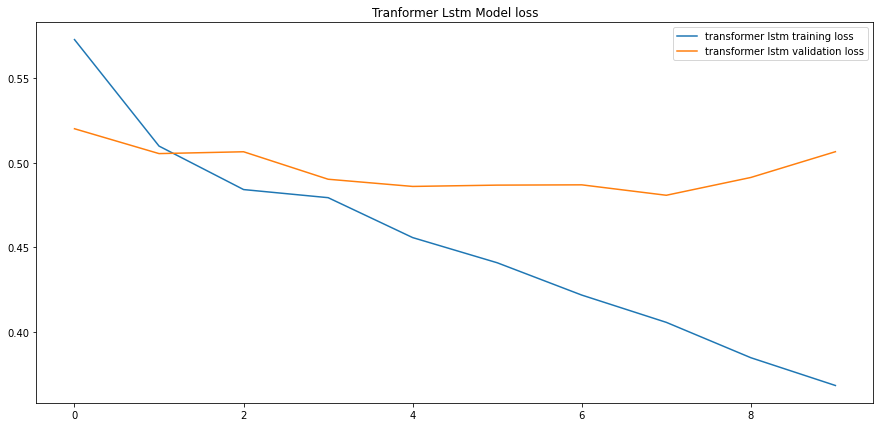

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
(plot_df['train']).plot(label = 'transformer lstm training loss', figsize = (15,7))
(plot_df['validation']).plot(label = 'transformer lstm validation loss', figsize = (15,7))
plt.title('Tranformer Lstm Model loss')
plt.legend()

In [ ]:
print("accuracy_list", accuracy_list)
print("f1_list", f1_list)

accuracy_list [0.95507080078125, 0.946455078125, 0.7660400390625, 0.95378662109375, 0.9586767578125, 0.95787109375, 0.95803466796875, 0.95770263671875, 0.82725341796875, 0.953994140625]
f1_list [0.8832673989204243, 0.8511898247772076, 0.6283544744013687, 0.8695165330352759, 0.8876155819636948, 0.8741204021061687, 0.8758705378673205, 0.8822299309134118, 0.6829979786439885, 0.8707962314092992]


In [ ]:
LEARING_RATE = 0.002
HIDDEN_DIM_SIZE = 256
NUM_EPOCS = 10

model = TransformerClassifierModel()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = AdamW(model.parameters(),lr = LEARING_RATE)

train_losses = []
valid_losses = []
accuracy_list = []
f1_list = []

for epoch in range(NUM_EPOCS):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, NUM_EPOCS))
    
    #train model
    train_loss = train(train_dataloader, is_early=True)
    
    #evaluate model
    valid_loss, e_pred, e_label = evaluate(val_dataloader, is_early=True)

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    # accuracy_list.append(accuracy)
    # f1_list.append(valid_f1)

    print('Train loss:', train_loss, 'Val loss:', valid_loss)
    labels_bool = [ elem > 0 for elem in e_label]
    preds_bool = [elem > 0 for elem in e_pred][0: len(labels_bool)]
    accuracy = accuracy_score(labels_bool, preds_bool)
    valid_f1 = f1_score(labels_bool, preds_bool,average="macro")
    print('Accuracy:', accuracy, 'F1:', valid_f1)
    accuracy_list.append(accuracy)
    f1_list.append(valid_f1)


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,



 Epoch 1 / 10


 26%|██▌       | 52/200 [00:07<00:22,  6.72it/s]

  Batch    50  of    200.
loss 0.5632674694061279


 51%|█████     | 102/200 [00:14<00:14,  6.81it/s]

  Batch   100  of    200.
loss 0.560157835483551


 76%|███████▌  | 152/200 [00:22<00:07,  6.83it/s]

  Batch   150  of    200.
loss 0.5654376745223999


100%|██████████| 200/200 [00:29<00:00,  6.89it/s]



Evaluating...


100%|██████████| 100/100 [00:13<00:00,  7.65it/s]


Train loss: 0.5921614353358745 Val loss: 0.5808521384000778
Accuracy: 0.9370166015625 F1: 0.8480135500477871

 Epoch 2 / 10


 26%|██▌       | 52/200 [00:07<00:21,  6.83it/s]

  Batch    50  of    200.
loss 0.5475550889968872


 51%|█████     | 102/200 [00:14<00:14,  6.80it/s]

  Batch   100  of    200.
loss 0.5400851368904114


 76%|███████▌  | 152/200 [00:22<00:06,  6.91it/s]

  Batch   150  of    200.
loss 0.537590503692627


100%|██████████| 200/200 [00:29<00:00,  6.89it/s]



Evaluating...


100%|██████████| 100/100 [00:13<00:00,  7.68it/s]


Train loss: 0.5706167432665825 Val loss: 0.5633469614386558
Accuracy: 0.9483935546875 F1: 0.8736026783044883

 Epoch 3 / 10


 26%|██▌       | 52/200 [00:07<00:22,  6.58it/s]

  Batch    50  of    200.
loss 0.6357342600822449


 51%|█████     | 102/200 [00:14<00:14,  6.98it/s]

  Batch   100  of    200.
loss 0.6037139892578125


 76%|███████▌  | 152/200 [00:21<00:06,  6.94it/s]

  Batch   150  of    200.
loss 0.627623975276947


100%|██████████| 200/200 [00:28<00:00,  6.93it/s]



Evaluating...


100%|██████████| 100/100 [00:13<00:00,  7.54it/s]


Train loss: 0.5756925390660763 Val loss: 0.5840209281444549
Accuracy: 0.57147705078125 F1: 0.4904557411535718

 Epoch 4 / 10


 26%|██▌       | 52/200 [00:07<00:21,  6.93it/s]

  Batch    50  of    200.
loss 0.5066060423851013


 51%|█████     | 102/200 [00:14<00:14,  6.78it/s]

  Batch   100  of    200.
loss 0.5510021448135376


 76%|███████▌  | 152/200 [00:22<00:06,  6.91it/s]

  Batch   150  of    200.
loss 0.5356445908546448


100%|██████████| 200/200 [00:29<00:00,  6.89it/s]



Evaluating...


100%|██████████| 100/100 [00:13<00:00,  7.65it/s]


Train loss: 0.5707379561662674 Val loss: 0.5660811212658882
Accuracy: 0.64422119140625 F1: 0.5458714978648356

 Epoch 5 / 10


 26%|██▌       | 52/200 [00:07<00:21,  6.84it/s]

  Batch    50  of    200.
loss 0.5212880969047546


 51%|█████     | 102/200 [00:14<00:13,  7.03it/s]

  Batch   100  of    200.
loss 0.543208122253418


 76%|███████▌  | 152/200 [00:21<00:07,  6.69it/s]

  Batch   150  of    200.
loss 0.5398697257041931


100%|██████████| 200/200 [00:28<00:00,  6.90it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  7.79it/s]


Train loss: 0.5617861440777778 Val loss: 0.5629051429033279
Accuracy: 0.66817138671875 F1: 0.5628672478841387

 Epoch 6 / 10


 26%|██▌       | 52/200 [00:07<00:21,  6.87it/s]

  Batch    50  of    200.
loss 0.5888099074363708


 51%|█████     | 102/200 [00:14<00:14,  6.79it/s]

  Batch   100  of    200.
loss 0.5551814436912537


 76%|███████▌  | 152/200 [00:21<00:06,  7.02it/s]

  Batch   150  of    200.
loss 0.5165014863014221


100%|██████████| 200/200 [00:28<00:00,  6.97it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  7.80it/s]


Train loss: 0.554505757689476 Val loss: 0.5565310081839562
Accuracy: 0.78576904296875 F1: 0.6606556831153048

 Epoch 7 / 10


 26%|██▌       | 52/200 [00:07<00:21,  6.76it/s]

  Batch    50  of    200.
loss 0.5866114497184753


 51%|█████     | 102/200 [00:14<00:14,  6.76it/s]

  Batch   100  of    200.
loss 0.6088260412216187


 76%|███████▌  | 152/200 [00:22<00:07,  6.80it/s]

  Batch   150  of    200.
loss 0.5693945288658142


100%|██████████| 200/200 [00:29<00:00,  6.86it/s]



Evaluating...


100%|██████████| 100/100 [00:13<00:00,  7.66it/s]


Train loss: 0.5531423372030259 Val loss: 0.5562736517190934
Accuracy: 0.90194580078125 F1: 0.7903203354281949

 Epoch 8 / 10


 26%|██▌       | 52/200 [00:07<00:21,  6.83it/s]

  Batch    50  of    200.
loss 0.510158360004425


 51%|█████     | 102/200 [00:14<00:14,  6.73it/s]

  Batch   100  of    200.
loss 0.5624638795852661


 76%|███████▌  | 152/200 [00:21<00:06,  6.90it/s]

  Batch   150  of    200.
loss 0.5273667573928833


100%|██████████| 200/200 [00:28<00:00,  6.93it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  7.73it/s]


Train loss: 0.5482437770068646 Val loss: 0.5551736515760421
Accuracy: 0.801748046875 F1: 0.6740525169973585

 Epoch 9 / 10


 26%|██▌       | 52/200 [00:07<00:21,  6.89it/s]

  Batch    50  of    200.
loss 0.5178220272064209


 51%|█████     | 102/200 [00:14<00:14,  6.82it/s]

  Batch   100  of    200.
loss 0.5547429323196411


 76%|███████▌  | 152/200 [00:21<00:06,  6.90it/s]

  Batch   150  of    200.
loss 0.49549737572669983


100%|██████████| 200/200 [00:28<00:00,  6.95it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  7.73it/s]


Train loss: 0.5494360297918319 Val loss: 0.5620496183633804
Accuracy: 0.836484375 F1: 0.7060208456968158

 Epoch 10 / 10


 26%|██▌       | 52/200 [00:07<00:21,  6.88it/s]

  Batch    50  of    200.
loss 0.5457888245582581


 51%|█████     | 102/200 [00:14<00:14,  6.85it/s]

  Batch   100  of    200.
loss 0.5630878806114197


 76%|███████▌  | 152/200 [00:21<00:07,  6.76it/s]

  Batch   150  of    200.
loss 0.5544557571411133


100%|██████████| 200/200 [00:28<00:00,  6.95it/s]



Evaluating...


100%|██████████| 100/100 [00:12<00:00,  7.71it/s]


Train loss: 0.5504375100135803 Val loss: 0.5589354425668717
Accuracy: 0.85314208984375 F1: 0.7264295760014101


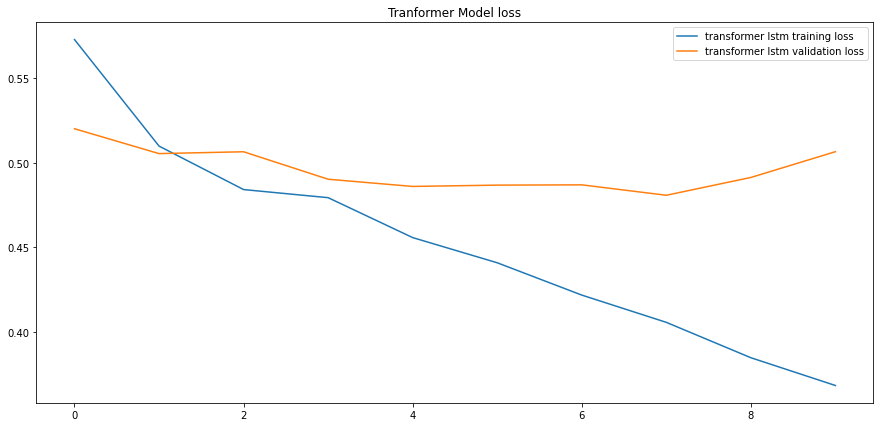

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
(plot_df['train']).plot(label = 'transformer lstm training loss', figsize = (15,7))
(plot_df['validation']).plot(label = 'transformer lstm validation loss', figsize = (15,7))
plt.title('Tranformer Model loss')
plt.legend()

In [ ]:
print("accuracy_list", accuracy_list)
print("f1_list", f1_list)

accuracy_list [0.9370166015625, 0.9483935546875, 0.57147705078125, 0.64422119140625, 0.66817138671875, 0.78576904296875, 0.90194580078125, 0.801748046875, 0.836484375, 0.85314208984375]
f1_list [0.8480135500477871, 0.8736026783044883, 0.4904557411535718, 0.5458714978648356, 0.5628672478841387, 0.6606556831153048, 0.7903203354281949, 0.6740525169973585, 0.7060208456968158, 0.7264295760014101]
